<a href="https://colab.research.google.com/github/Ishan0704/Suspicious-Transaction-Detection/blob/main/Kaggle_Malware_Dataset_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Malware dataset.csv')
df

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df.isnull().sum()  # Check for missing values
df = df.dropna()  # Remove rows with missing values


In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,995,4096,0,3070148608,13988,0,0,0,10406,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,996,4096,0,3070148608,13988,0,0,0,10406,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,997,4096,0,3070148608,13988,0,0,0,10406,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,998,4096,0,3070148608,13988,0,0,0,10406,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


In [8]:
scaled_data

array([[-1.73031962, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [-1.72685552, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [-1.72339142, -0.16852568,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       ...,
       [ 1.72339142, -0.1641504 ,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [ 1.72685552, -0.1641504 ,  0.        , ..., -0.50916578,
         0.        ,  0.        ],
       [ 1.73031962, -0.1641504 ,  0.        , ..., -0.50916578,
         0.        ,  0.        ]])

Elblow Method for Best Number of clusters

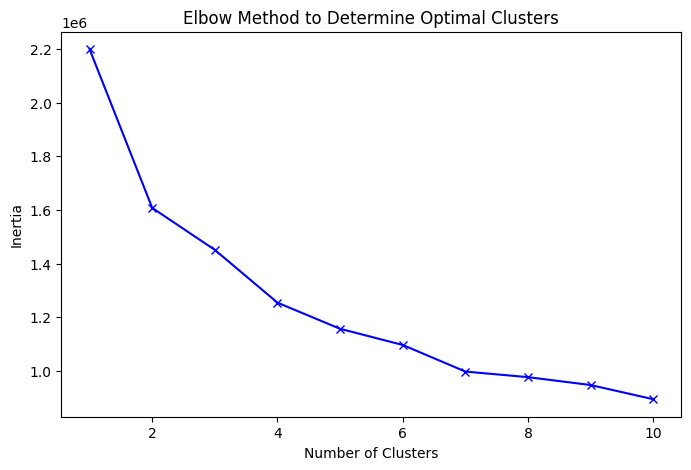

In [9]:
inertia = []
K = range(1, 11)  # Try clusters from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()


In [10]:
n_clusters = 4  # Replace this with your chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters


In [11]:
df['Cluster'].value_counts()


,count
Cluster,
3,36695
0,30711
2,17493
1,15101


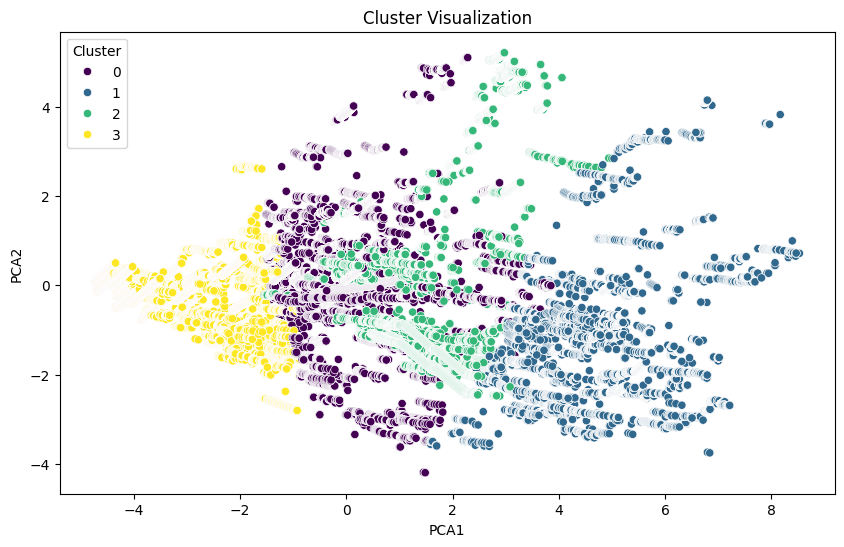

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Cluster Visualization')
plt.show()


In [13]:
# Apply K-Means clustering with the selected number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

# Get cluster labels and add to the original data
data['Cluster'] = kmeans.labels_


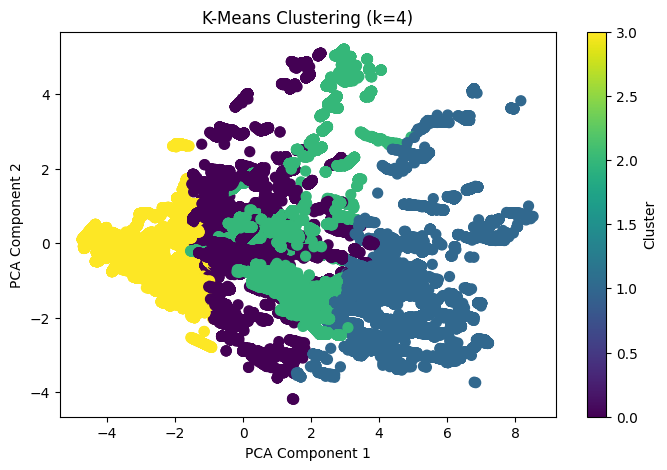

In [19]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into features (X) and target labels (y)
X = scaled_data  # Features
y = df['Cluster']  # Cluster labels from K-Means

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.86%
